In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [66]:
# Load dataset
df= pd.read_csv("diabetic_data.csv")

In [67]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [68]:
import re #regex!

# Define a function to clean the age column
def clean_age(age):
    age = str(age) # Convert to string
    age = re.sub('[^0-9\-]', '', age) # Remove any non-numeric characters
    age = age.split('-') # Split the string into a list of values
    age = [int(x) for x in age if x != ''] # Convert each value to an integer and remove any empty strings
    if len(age) == 1:
        return age[0]
    else:
        return sum(age)/2 # Return the average of the lower and upper bounds of the age group

# Apply the clean_age function to the age column
df['age'] = df['age'].apply(clean_age)

In [69]:
df['race'].replace('?', np.nan, inplace=True)
# Replace missing values in the race column with the most frequent value
df['race'] = df['race'].fillna(df['race'].mode()[0])

## Univarient analysis

In [72]:
df_gthirty= df.loc[df['readmitted']=='<30']
df_lthirty= df.loc[df['readmitted']=='>30']
df_no= df.loc[df['readmitted']=='NO']

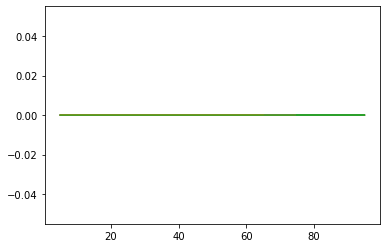

In [74]:
plt.plot(df_lthirty['age'],np.zeros_like(df_lthirty['age']))
plt.plot(df_gthirty['age'],np.zeros_like(df_gthirty['age']))
plt.plot(df_no['age'],np.zeros_like(df_no['age']))
plt.show()

## Bivarient Analysis

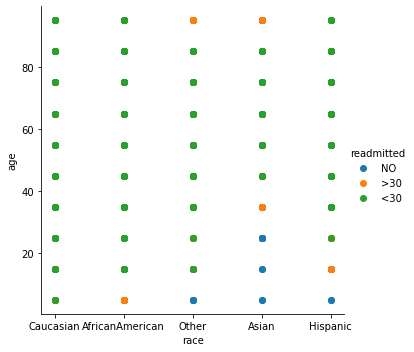

In [75]:
sns.FacetGrid(df,hue='readmitted',size=5).map(plt.scatter,"race","age").add_legend();

## Multivarient Analysis

In [76]:
cols =['age','race','number_diagnoses','readmitted']

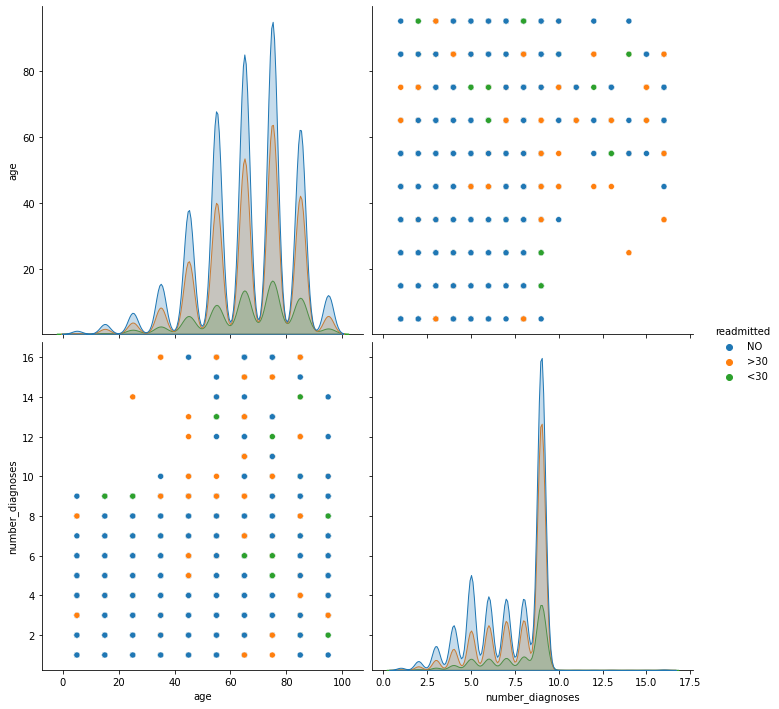

In [77]:
sns.pairplot(df[cols],hue='readmitted',size=5)